Good and Bad Pie Charts with data from the Titanic Database
- Will Holt
- Group 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = r'../../Data/test.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


take a good pie chart and ruin it

In [4]:
class_counts = df['Pclass'].value_counts()

In [5]:
colors = ['#4C72B0', '#55A868', '#C44E52']

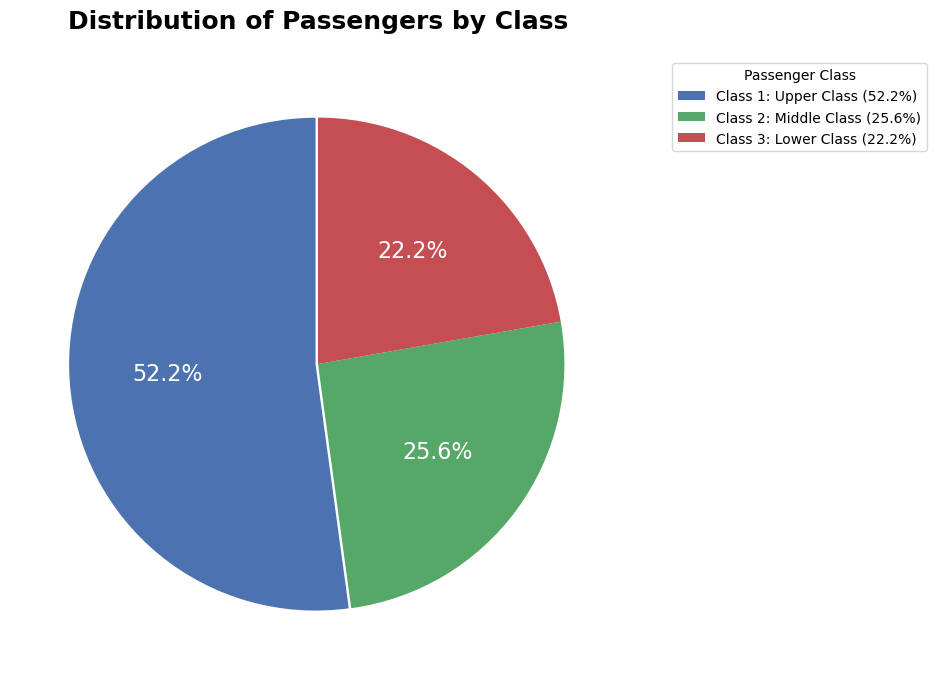

In [6]:
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    class_counts,
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.01, 0, 0),
    textprops={'fontsize':16, 'color': 'white'}
)
plt.legend(
    wedges, 
    ['Class 1: Upper Class (52.2%)', 'Class 2: Middle Class (25.6%)', 'Class 3: Lower Class (22.2%)'],
    title="Passenger Class",
    loc="upper right",
    bbox_to_anchor=(1, 0, 0.5, 1)
)    

plt.title('Distribution of Passengers by Class', fontsize=18, fontweight='bold', pad=20)
plt.gca().set_aspect('equal')

plt.show()

This pie chart is effective because it sticks to the best practices as outlined in our readings for the module. The colors are soft and complementary. This allows for a pleasant differentiation of slices and limits the viewer from being overwhelmed in any way. The 'explode' effect used draws subtle attention to the largest passenger class without dramatically altering the presentation. The percentages are accurate and provide insightful information about the distribution of passenger class aboard the Titanic. The legend is well positioned and could stand on it's own, demonstrating its quality. Overall this pie chart is professionally designed and effectively communicates the data with 0 room for misleading audiences. 

# <span style="font-family: 'Jokerman', cursive; color: darkred; text-shadow: 2px 2px 4px black;">Let's ruin it.</span>

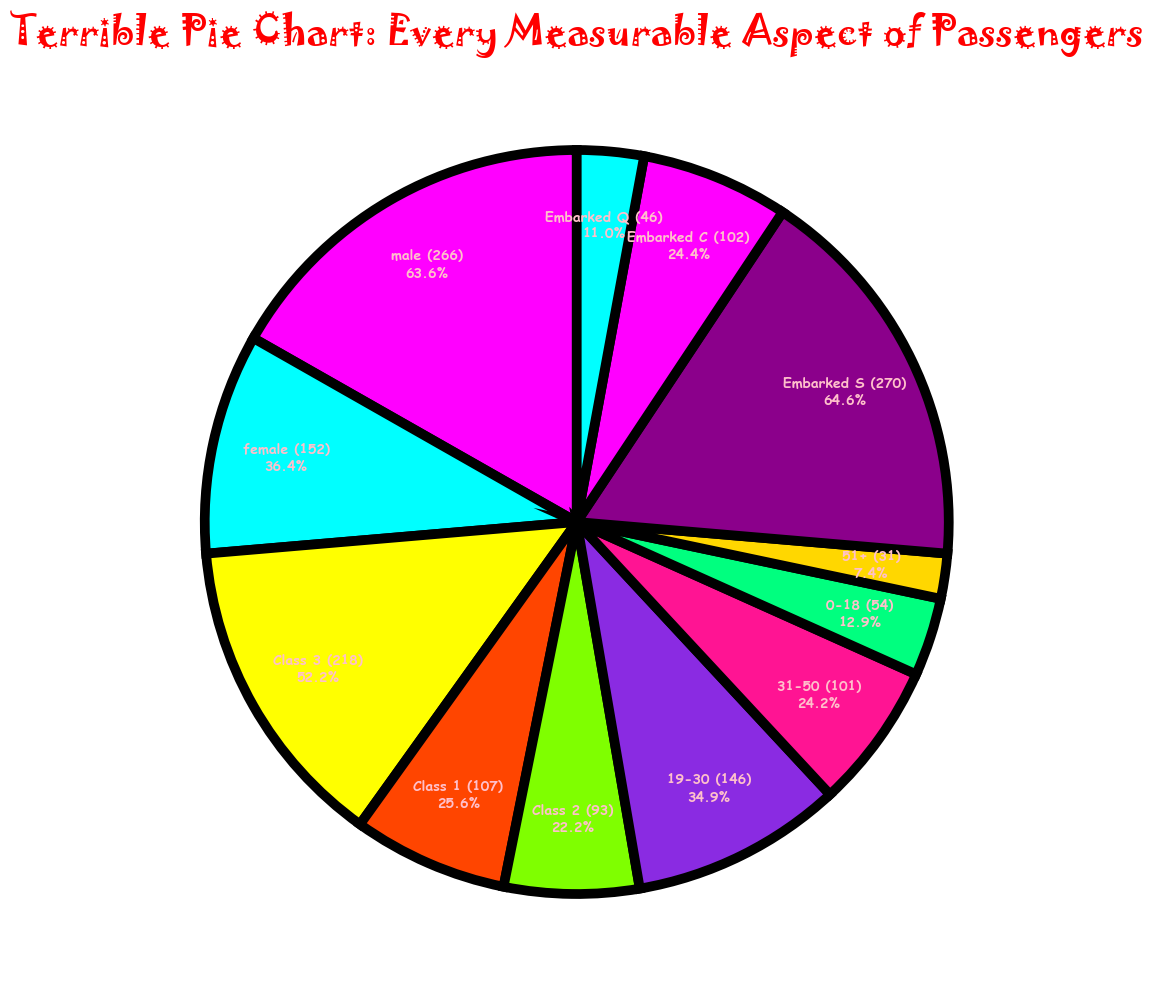

In [7]:
#this section was created with the help and troubleshooting of DeepSeek AI
fig, ax = plt.subplots(figsize=(12, 16))
colors = ['#FF00FF', '#00FFFF', '#FFFF00', '#FF4500', '#7FFF00', '#8A2BE2', '#FF1493', '#00FF7F', '#FFD700', '#8B008B']

slices = []
labels = []
percentages = []

gender_counts = df['Sex'].value_counts()
for gender, count in gender_counts.items():
    slices.append(count)
    labels.append(f'{gender} ({count})')
    percentages.append(f'{count / len(df) * 100:.1f}%')

class_counts = df['Pclass'].value_counts()
for pclass, count in class_counts.items():
    slices.append(count)
    labels.append(f'Class {pclass} ({count})')
    percentages.append(f'{count / len(df) * 100:.1f}%')

age_bins = [0, 18, 30, 50, 100]
age_labels = ['0-18', '19-30', '31-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_counts = df['AgeGroup'].value_counts()
for age_group, count in age_counts.items():
    slices.append(count)
    labels.append(f'{age_group} ({count})')
    percentages.append(f'{count / len(df) * 100:.1f}%')

embarked_counts = df['Embarked'].value_counts()
for port, count in embarked_counts.items():
    slices.append(count)
    labels.append(f'Embarked {port} ({count})')
    percentages.append(f'{count / len(df) * 100:.1f}%')

wedges, texts = ax.pie(
    slices,
    labels=None,  
    colors=colors[:len(slices)],  
    startangle=90,
    wedgeprops=dict(edgecolor='black', linewidth=7),
    textprops={'fontsize': 16, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Comic Sans MS'}
)

for i, (wedge, label, percentage) in enumerate(zip(wedges, labels, percentages)):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{label}\n{percentage}', ha='center', va='center', fontsize=10, fontweight='bold', color='pink', fontname='Comic Sans MS')

ax.set_title(
    'Terrible Pie Chart: Every Measurable Aspect of Passengers',
    fontsize=28,
    fontweight='bold',
    color='red',
    fontname='Jokerman'  
)

ax.set_axis_off()

plt.show()

Now we have successfully taken a decent pie chart and turned it into something a little less beautiful. In our attempts to 'improve' the original pie chart, we somehow broke most of the data visualization rules. The beautiful neon colors remind the viewer of a kaleidoscope, and the thick black borders remind me of a beautiful stained glass church window. The labels are tiny and pink and in Comic Sans font. This allows the audience to focus more on the design of the visualization instead of the information. The Jokerman font title needs no further explanation. Finally, if you sift through all of that, you find that the percentages don't add up to 100%. By attempting to increase the amount of information shown, the true message of the data has actually been completely lost.